In [28]:
import re, os, sys, json, time, requests
from pathlib import Path
import pandas as pd
import numpy as np

In [29]:
# TODO load config.json, load eval.parquet
fs = sorted(Path('../outputs').glob('**/eval.parquet'))
fs

[PosixPath('../outputs/code-Qwen3-0.6B/Qwen-Qwen3-06B_dpo_code/2025-05-28_13-41-09/eval.parquet'),
 PosixPath('../outputs/code-Qwen3-0.6B/Qwen-Qwen3-06B_hs-ETHER-InnerPO_code/2025-05-28_14-08-42/eval.parquet'),
 PosixPath('../outputs/code-Qwen3-0.6B/Qwen-Qwen3-06B_hs-None-InnerPO_code/2025-05-28_14-39-24/eval.parquet'),
 PosixPath('../outputs/code-Qwen3-0.6B/Qwen-Qwen3-06B_hs-SupressedHS-InnerPO_code/2025-05-28_13-10-12/eval.parquet'),
 PosixPath('../outputs/math-Qwen3-0.6B/Qwen-Qwen3-06B_dpo_math/2025-05-28_11-05-54/eval.parquet'),
 PosixPath('../outputs/math-Qwen3-0.6B/Qwen-Qwen3-06B_hs-ETHER-InnerPO_math/2025-05-28_11-35-54/eval.parquet'),
 PosixPath('../outputs/math-Qwen3-0.6B/Qwen-Qwen3-06B_hs-None-InnerPO_math/2025-05-28_12-08-37/eval.parquet'),
 PosixPath('../outputs/math-Qwen3-0.6B/Qwen-Qwen3-06B_hs-SupressedHS-InnerPO_math/2025-05-28_10-31-26/eval.parquet'),
 PosixPath('../outputs/math-Qwen3-0.6B/Qwen-Qwen3-06B_projgrad_math/2025-05-28_12-40-31/eval.parquet')]

In [30]:
def load_config_df(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    config.update(config.pop('post'))
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 3) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    return config_df


df = pd.concat([load_config_df(f) for f in fs])
df.columns

# load_config(fs[0])

Qwen-Qwen3-06B_dpo_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-None-InnerPO_code
Qwen-Qwen3-06B_hs-SupressedHS-InnerPO_code
Qwen-Qwen3-06B_dpo_math
Qwen-Qwen3-06B_hs-ETHER-InnerPO_math
Qwen-Qwen3-06B_hs-None-InnerPO_math
Qwen-Qwen3-06B_hs-SupressedHS-InnerPO_math
Qwen-Qwen3-06B_projgrad_math


Index(['dataset', 'verbose', 'seed', 'dev', 'load_in_4bit', 'load_in_8bit',
       'use_gradient_checkpointing', 'batch_size', 'n_samples', 'eval_samples',
       'max_length', 'max_prompt_length', 'base_model', 'save', 'wandb', 'lr',
       'group_name', 'adapter_name', 'human_name', 'model_fname',
       'ds_name_train', 'run_fname', 'save_dir', 'ts', 'file', 'method',
       'collection_layers', 'collect_input', 'collect_hs', 'β', 'reverse_pref',
       'weight_dim', 'scale_orth', 'neg_slope', 'mag_clip', 'use_pref_ref'],
      dtype='object')

In [31]:
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config['file'] = f
    config['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 3) # this is {model}_{method}_{dataset}
    config['method'] = method

    return config


# df = pd.concat([load_config(f) for f in fs])
# df.columns

load_config(fs[0])

Qwen-Qwen3-06B_dpo_code


{'dataset': 'code',
 'verbose': 1,
 'seed': 1,
 'dev': False,
 'load_in_4bit': False,
 'load_in_8bit': False,
 'use_gradient_checkpointing': False,
 'batch_size': 8,
 'n_samples': 10000,
 'eval_samples': None,
 'max_length': 256,
 'max_prompt_length': 128,
 'base_model': 'Qwen/Qwen3-0.6B',
 'save': True,
 'wandb': True,
 'lr': 6e-05,
 'post': {'group_name': 'code-Qwen3-0.6B',
  'adapter_name': 'dpo',
  'human_name': 'DPO dataset=code seed=1',
  'model_fname': 'Qwen-Qwen3-06B_dpo_code',
  'ds_name_train': 'code',
  'run_fname': 'dpo/134109',
  'save_dir': '/media/wassname/SGIronWolf/projects5/elk/repr-preference-optimization/outputs/code-Qwen3-0.6B/Qwen-Qwen3-06B_dpo_code/2025-05-28_13-41-09',
  'ts': '134109'},
 'file': PosixPath('../outputs/code-Qwen3-0.6B/Qwen-Qwen3-06B_dpo_code/2025-05-28_13-41-09/eval.parquet'),
 'ts': '2025-05-28_13-41-09',
 'method': 'dpo'}

In [32]:
# TODO add seed, train, other parts from config
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 3) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    df = pd.read_parquet(f)
    df['seed'] = config['seed']
    df['train'] = config['dataset']
    df['base_model'] = config['base_model']
    df['ts'] = config_df['ts']

    return df

df_res2 = pd.concat([load_config(f) for f in fs])
df_res2.columns

Qwen-Qwen3-06B_dpo_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-None-InnerPO_code
Qwen-Qwen3-06B_hs-SupressedHS-InnerPO_code
Qwen-Qwen3-06B_dpo_math
Qwen-Qwen3-06B_hs-ETHER-InnerPO_math
Qwen-Qwen3-06B_hs-None-InnerPO_math
Qwen-Qwen3-06B_hs-SupressedHS-InnerPO_math
Qwen-Qwen3-06B_projgrad_math


Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected',
       '_policy_weights', '_chosen_weight_logp', '_rejected_weight_logp',
       'adapter', 'seed', 'train', 'target', 'type', 'label', 'category',
       'ds_name_nice', 'base_model', 'ts'],
      dtype='object')

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [34]:
from reprpo.data.util import sort_str, nice_ds_name

df_res2.columns

Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected',
       '_policy_weights', '_chosen_weight_logp', '_rejected_weight_logp',
       'adapter', 'seed', 'train', 'target', 'type', 'label', 'category',
       'ds_name_nice', 'base_model', 'ts'],
      dtype='object')

code


ds_name_nice,cross_domain (change_my_view),cross_domain (counterfactual_python),cross_domain (us_history),in_domain (code),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,,
none,0.504±nan,0.581±nan,0.816±nan,0.900±nan,0.326±nan
hs-ETHER-InnerPO,0.536±nan,0.536±nan,0.731±nan,0.853±nan,0.267±nan
hs-SupressedHS-InnerPO,0.536±nan,0.803±nan,0.823±nan,0.923±nan,0.235±nan
hs-None-InnerPO,0.544±nan,0.424±nan,0.545±nan,0.479±nan,0.421±nan
dpo,0.588±nan,0.819±nan,0.848±nan,0.928±nan,0.275±nan


,in_domain,cross_domain,orthogonal
adapter / distribution_shift,,,
none,0.798±nan,0.928±nan,0.275±nan
dpo,0.671±nan,0.900±nan,0.326±nan
hs-ETHER-InnerPO,0.493±nan,0.479±nan,0.421±nan
hs-None-InnerPO,0.619±nan,0.853±nan,0.267±nan
hs-SupressedHS-InnerPO,0.773±nan,0.923±nan,0.235±nan


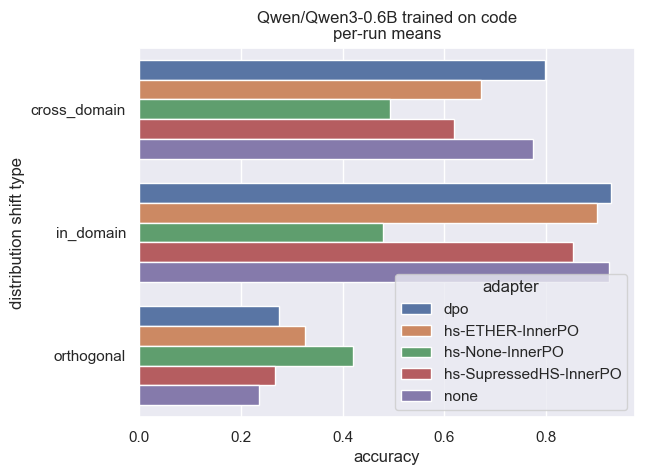

math


ds_name_nice,cross_domain (change_my_view),cross_domain (cooking),cross_domain (math_fiction),in_domain (math),moral_transfer (ethics_commonsense),moral_transfer (ethics_deontology),moral_transfer (ethics_justice),moral_transfer (ethics_utilitarianism),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,,,,,,
none,0.468±nan,0.575±nan,0.856±nan,0.907±nan,0.498±nan,0.530±nan,0.433±nan,0.482±nan,0.322±nan
hs-SupressedHS-InnerPO,0.476±nan,0.484±nan,0.543±nan,0.535±nan,0.467±nan,0.478±nan,0.530±nan,0.500±nan,0.448±nan
hs-None-InnerPO,0.536±nan,0.803±nan,0.904±nan,0.871±nan,0.551±nan,0.582±nan,0.435±nan,0.507±nan,0.235±nan
dpo,0.560±nan,0.776±nan,0.909±nan,0.947±nan,0.576±nan,0.577±nan,0.438±nan,0.514±nan,0.244±nan
projgrad,0.568±nan,0.781±nan,0.927±nan,0.961±nan,0.574±nan,0.577±nan,0.433±nan,0.513±nan,0.258±nan
hs-ETHER-InnerPO,0.616±nan,0.529±nan,0.716±nan,0.901±nan,0.510±nan,0.472±nan,0.509±nan,0.489±nan,0.528±nan


,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.802±nan,0.947±nan,0.526±nan,0.244±nan
dpo,0.622±nan,0.901±nan,0.489±nan,0.528±nan
hs-ETHER-InnerPO,0.508±nan,0.535±nan,0.495±nan,0.448±nan
hs-None-InnerPO,0.680±nan,0.907±nan,0.489±nan,0.322±nan
hs-SupressedHS-InnerPO,0.808±nan,0.871±nan,0.521±nan,0.235±nan
projgrad,0.813±nan,0.961±nan,0.525±nan,0.258±nan


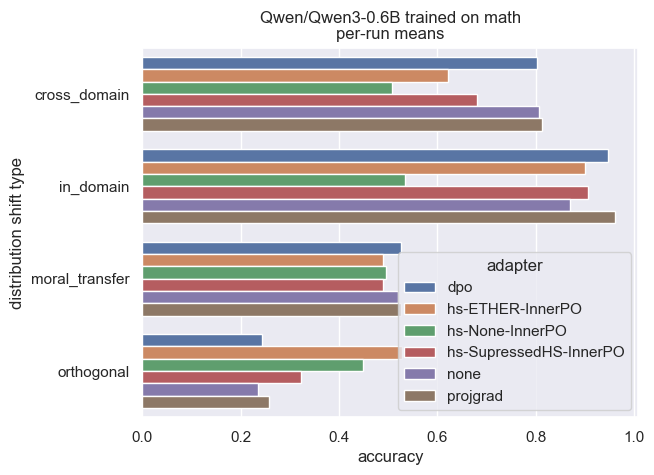

In [35]:
for train_set, group in df_res2.groupby("train"):
    print(train_set)
    # per-run means for each seed, dataset, adapter
    run_stats = group.groupby(["seed", "ds_name_nice", "adapter"])['correct'].mean().reset_index()
    stats = run_stats.groupby(["ds_name_nice", "adapter"])['correct'].agg(['mean','std']).reset_index()
    mean_df = stats.pivot(index='adapter', columns='ds_name_nice', values='mean')
    std_df = stats.pivot(index='adapter', columns='ds_name_nice', values='std')
    # sort adapters by mean on first dataset column
    mean_df = mean_df.sort_values(by=mean_df.columns[0], axis=0)
    mean_df.index = sort_str(mean_df.index.tolist(), first=['base','none'])
    mean_df.index.name = 'adapter/ds'
    # combine mean and std into strings
    df_res_ds = mean_df.copy()
    for col in mean_df.columns:
        df_res_ds[col] = mean_df[col].combine(std_df[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_ds)

    # per-run means for distribution shift types
    run_stats2 = group.groupby(["seed", "type", "adapter"])['correct'].mean().reset_index()
    stats2 = run_stats2.groupby(["type", "adapter"])['correct'].agg(['mean','std']).reset_index()
    mean2 = stats2.pivot(index='adapter', columns='type', values='mean')
    std2 = stats2.pivot(index='adapter', columns='type', values='std')
    # reorder columns and adapters
    mean2.columns = sort_str(mean2.columns.tolist(), first=['in_domain'], last=['orthogonal'])
    mean2.index = sort_str(mean2.index.tolist(), first=['base','none'])
    mean2.index.name = 'adapter / distribution_shift'
    # combine mean and std into strings
    df_res_type = mean2.copy()
    for col in mean2.columns:
        df_res_type[col] = mean2[col].combine(std2[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_type)

    # bar chart
    base_model = group['base_model'].iloc[0]
    sns.barplot(data=run_stats2, y='type', x='correct', hue='adapter', errorbar='sd', orient='h', legend='full')
    plt.title(f"{base_model} trained on {train_set}\nper-run means")
    plt.ylabel('distribution shift type')
    plt.xlabel('accuracy')
    plt.show() 